In [1]:
import tweepy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
consumer_key = "o1cUWaL6GELbfGX3Lh9kPtVED"
consumer_secret = "EA9cOY89nw6fzaeSxZBnybftNbw3PgAwShuuesVwERsfZjCU5q"
access_token = "160423835-YaNKnDvCBuWekU1l7PhPtrnWr4A8ZkSx1h14eS1H"
access_token_secret = "97jipFE2lHtoJyl8JG3ML9q9adFWJ3MckKvs1PQnhGfZC"

#Set up Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

target_users = ('BBCWorld', 'CBS', 'CNN', 'FoxNews', 'nytimes')

In [3]:
# Variables for holding sentiment
user_name = []
compound_list = []
pos_list = []
neg_list = []
neu_list = []
tweet_times = []
tweet_text = []

for user in target_users:

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            #Get time tweet created
            raw_time = tweet["created_at"]
            tweet_times.append(raw_time)
            
            #Get tweet text
            text = tweet["text"]

            # Run compound Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
            user_name.append(user)
            tweet_text.append(text)
            
print(len(compound_list))
print(len(user_name))
print(len(tweet_times))
print(len(pos_list))
print(len(neg_list))
print(len(neu_list))
print(len(tweet_text))

499
499
499
499
499
499
499


In [4]:
converted_timestamps = []
for raw_time in tweet_times:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
print(len(converted_timestamps))

499


In [5]:
#Create DataFrame from name of news organization and compound_list
scores_df = pd.DataFrame({"News Organization": user_name,
                          "Tweet Text": tweet_text,
                          "Positive Sentiment": pos_list,
                          "Negative Sentiment": neg_list,
                          "Neutral Sentiment": neu_list,
                          "Compound Sentiment": compound_list,
                          "Time of Tweet": converted_timestamps})
scores_df = scores_df.sort_values("Time of Tweet")
scores_df=scores_df.reset_index()
scores_df = scores_df[["News Organization", "Tweet Text", "Positive Sentiment", "Negative Sentiment", "Neutral Sentiment", "Compound Sentiment", "Time of Tweet"]]
scores_df.head()

,News Organization,Tweet Text,Positive Sentiment,Negative Sentiment,Neutral Sentiment,Compound Sentiment,Time of Tweet
0,CBS,RT @fifthpoesys: QUE PERFORMANCE MARAVILHOSA\n...,0.000,0.000,1.000,0.0000,2018-01-29 02:40:57+00:00
1,CBS,RT @naptural_mae: I have so much admiration fo...,0.321,0.000,0.679,0.5829,2018-01-29 02:40:59+00:00
2,CBS,RT @KathyLynn904: That’s was absolutely beauti...,0.419,0.000,0.581,0.8899,2018-01-29 02:45:57+00:00
3,CBS,RT if you're crying like @HaileeSteinfeld afte...,0.142,0.176,0.682,-0.1531,2018-01-29 02:49:24+00:00
4,CBS,That's what we like! @BrunoMars wins the #GRAM...,0.245,0.000,0.755,0.7574,2018-01-29 03:02:43+00:00


In [7]:
#Save News Tweets to csv
scores_df.to_csv('News_Tweets.csv', encoding="utf-8", index=False)

In [9]:
CBS = scores_df[scores_df["News Organization"] == "CBS"]
BBCWorld = scores_df[scores_df["News Organization"] == "BBCWorld"]
CNN = scores_df[scores_df["News Organization"] == "CNN"]
FoxNews = scores_df[scores_df["News Organization"] == "FoxNews"]
nytimes = scores_df[scores_df["News Organization"] == "nytimes"]

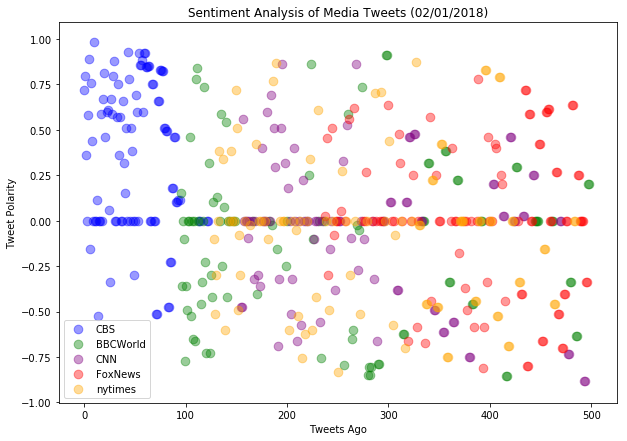

In [10]:
news_orgs = (CBS, BBCWorld, CNN, FoxNews, nytimes)
colors = ("Blue", "Green", "Purple", "Red", "Orange")
groups = ("CBS", "BBCWorld", "CNN", "FoxNews", "nytimes")

#Scatter plot
size = 75

fig, ax=plt.subplots(1,1,figsize=(10,7))

for news_org, color, group in zip(news_orgs, colors, groups):
    ax.scatter(news_org.index.values
              ,news_org["Compound Sentiment"]
              ,s=size
              ,alpha=0.4
              ,c=color
              ,label=group)
plt.legend()

plt.title("Sentiment Analysis of Media Tweets (02/01/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.show()

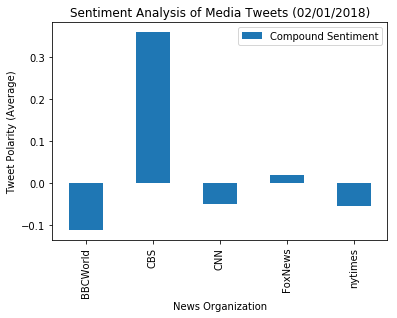

In [13]:
#Group by news organization
scores_mean = scores_df.groupby(scores_df["News Organization"]).mean()

#Bar Graph
scores_mean.plot(kind ="bar")


plt.legend()

plt.title("Sentiment Analysis of Media Tweets (02/01/2018)")
plt.xlabel("News Organization")
plt.ylabel("Tweet Polarity (Average)")

plt.show()